In [1]:
#Import neccessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import os
import pandas as pd
from time import process_time

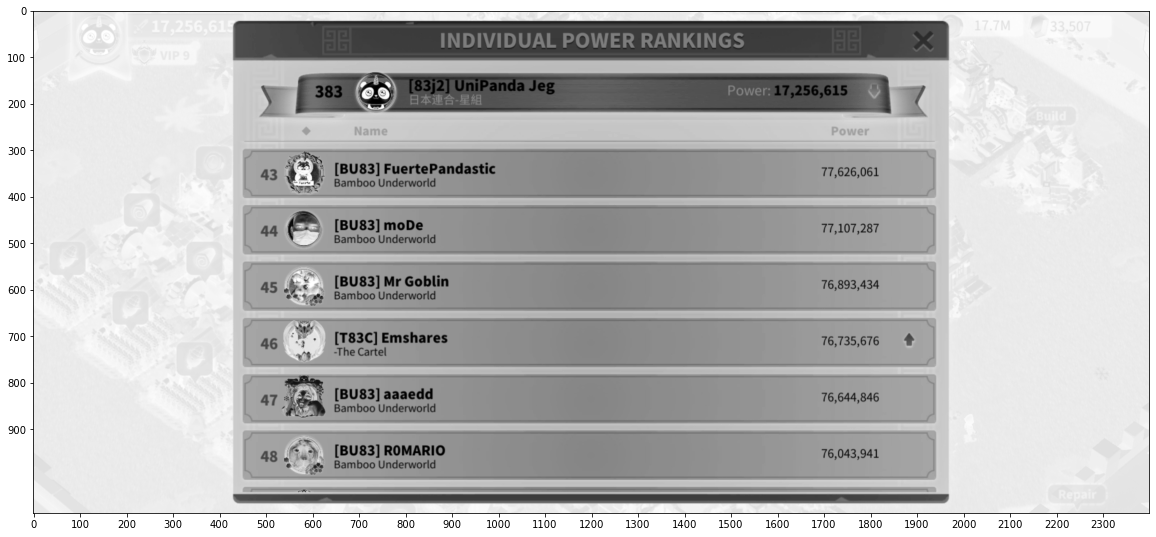

In [2]:
x='Screenshot_2022-05-02-10-24-00-847_com.lilithgame.roc.gp.jpg'
original_file_path=f'G:\Doc\Redmi Note 10 Pro\Individual Power Ranking\{x}'
read_image=cv2.imread(original_file_path, 0)
plt.figure(figsize= (20,20))
plt.xticks(np.arange(0, 2500, 100))
plt.yticks(np.arange(0, 1000, 100))
graph = plt.imshow(read_image,cmap='binary')
plt.show()

# Cropping the Image

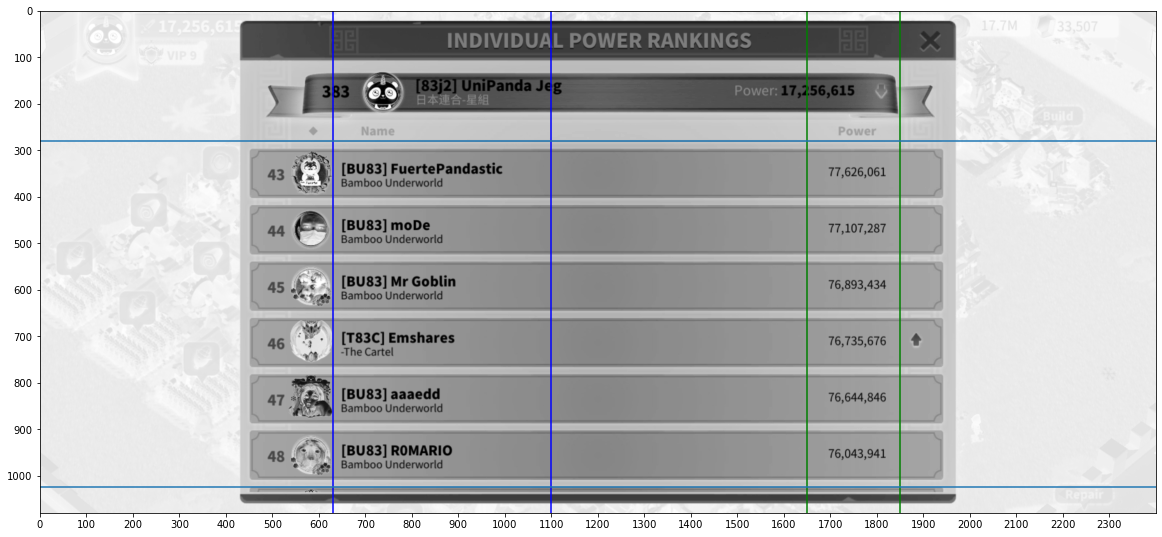

In [3]:
#Lets Crop the Image and remove unnecessary portions
#Ignore this part its just to show to xticks and yticks for cropping the image
read_image=cv2.imread(
'G:\Doc\Redmi Note 10 Pro\Individual Power Ranking\Screenshot_2022-05-02-10-24-00-847_com.lilithgame.roc.gp.jpg', 0)
plt.figure(figsize= (20,20))
plt.xticks(np.arange(0, 2500, 100))
plt.yticks(np.arange(0, 1200, 100))
plt.axvline(x = 630, color = 'b', label = 'axvline - full height')
plt.axvline(x = 1100, color = 'b', label = 'axvline - full height')
plt.axvline(x = 1650, color = 'g', label = 'axvline - full height')
plt.axvline(x = 1850, color = 'g', label = 'axvline - full height')
plt.axhline(y = 280, xmin= 0, xmax = 1)
plt.axhline(y = 1025, xmin = 0, xmax = 1)
graph = plt.imshow(read_image,cmap='binary')
plt.show()

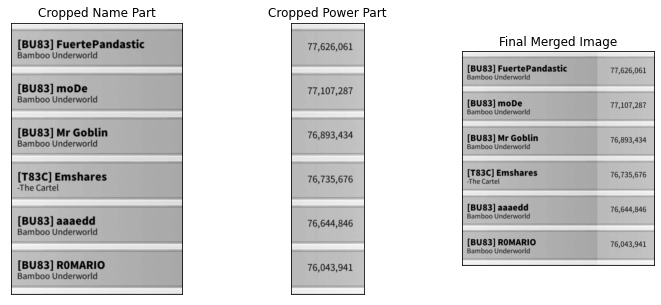

In [4]:
plt.figure(figsize= (20,5))
#Cropping Name Part
crop_img1 = read_image[280:1025, 630:1100]
crop1='G:\Doc\Redmi Note 10 Pro\crop_img1.jpg'
cv2.imwrite(crop1, crop_img1)
c1=cv2.imread(crop1,0)
plt.subplot(151),plt.imshow(c1,cmap='binary')
plt.title('Cropped Name Part'), plt.xticks([]), plt.yticks([])

#Cropping Power Part
crop_img2 = read_image[280:1025, 1650:1850]
crop2='G:\Doc\Redmi Note 10 Pro\crop_img2.jpg'
cv2.imwrite(crop2, crop_img2) 
c2=cv2.imread(crop2,0)
plt.subplot(152),plt.imshow(c2,cmap='binary')
plt.title('Cropped Power Part'), plt.xticks([]), plt.yticks([])

#Merging Name and Power Cropped Part
crop_img=cv2.hconcat([crop_img1, crop_img2])
crop3='G:\Doc\Redmi Note 10 Pro\crop_img.jpg'
cv2.imwrite(crop3, crop_img)
c3=cv2.imread(crop3,0)
plt.subplot(153),plt.imshow(c3,cmap='binary')
plt.title('Final Merged Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Converting Cropped Imaged to gray image without gridlines

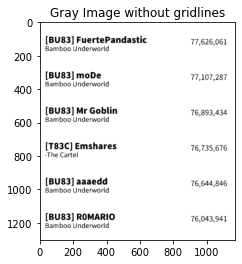

In [5]:
#Working on cropped image
read_crop_image=cv2.imread(crop3,0)
#Convert to gray scale
convert_bin,grey_scale = cv2.threshold(read_crop_image,0,255,cv2.THRESH_TOZERO | cv2.THRESH_OTSU)
grey_scale=255-grey_scale
h, w = grey_scale.shape[:2]
grey_scale = cv2.resize(grey_scale, (int(w*1.75), int(h*1.75)))
gray_image='G:\Doc\Redmi Note 10 Pro\gray_img.jpg'
plt.imsave(gray_image, grey_scale, cmap='gray')
plt.title('Gray Image without gridlines')
graph = plt.imshow(grey_scale,cmap='gray')
plt.show()

# Creating Column Grid Lines

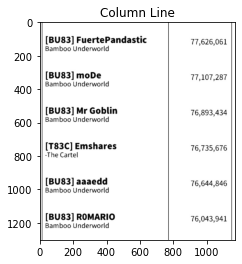

In [6]:
# read image
img = cv2.imread(gray_image)
hh, ww = img.shape[:2]
# convert to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# threshold gray image
thresh = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)[1]
# count number of non-zero pixels in each column
count = np.count_nonzero(thresh, axis=0)
# threshold count at hh (height of image)
count_thresh = count.copy()
count_thresh[count==hh] = 255
count_thresh[count<hh] = 0
count_thresh = count_thresh.astype(np.uint8)
# get contours
contours = cv2.findContours(count_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
# loop over contours and get bounding boxes and xcenter and draw vertical line at ycenter
result = img.copy()
for cntr in contours:
    # must transpose x,y and w,h since count is one-dimensional but represents each column
    y,x,h,w = cv2.boundingRect(cntr)
    #print(x,y,w,h)
    xcenter = x+w//2
    cv2.line(result, (xcenter,0), (xcenter, hh-1), (0, 0, 0), 2)
# save results
col_img='G:\Doc\Redmi Note 10 Pro\col.jpg'
cv2.imwrite(col_img, result)
plt.title('Column Line')
plt.imshow(result)
plt.show() 

#  Creating Row Grid Lines

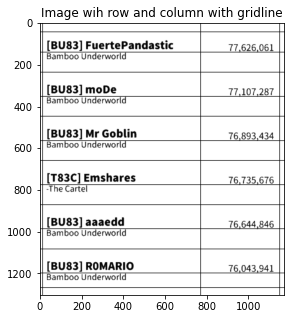

In [7]:
img = cv2.imread(col_img,0)
i=1
hh, ww = img.shape[:2]
# average gray image to one column
column = cv2.resize(img, (1,hh), interpolation = cv2.INTER_AREA)
# threshold on white
thresh = cv2.threshold(column, 250, 255, cv2.THRESH_BINARY)[1]
# get contours
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
# loop over contours and get bounding boxes and ycenter and draw horizontal line at ycenter
result = img.copy()
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    ycenter = y+h//2
    cv2.line(result, (0,ycenter), (ww-1,ycenter), (0, 0, 0), 2)
# write results
r=f'G:\Doc\Redmi Note 10 Pro\Img{i}.jpg'
cv2.imwrite(r, result)
plt.figure(figsize= (10,5))
plt.title('Image wih row and column with gridline')
graph = plt.imshow(result,cmap='gray') #use this code to check whether the gridline created properly or not
plt.show()

# Morphological Operations

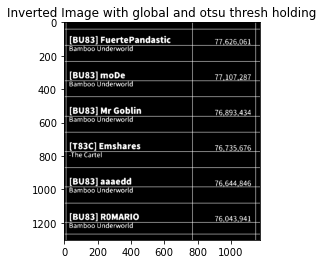

In [8]:
img = cv2.imread(r,0)
#Inverted Image with global thresh holding
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin #variable used at horizontal kernel
thresh1,img_bin_otsu = cv2.threshold(img_bin,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)#used at ver kernel
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with global and otsu thresh holding")
plt.show()

In [9]:
#define kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
print(kernel)

[[1 1]
 [1 1]]


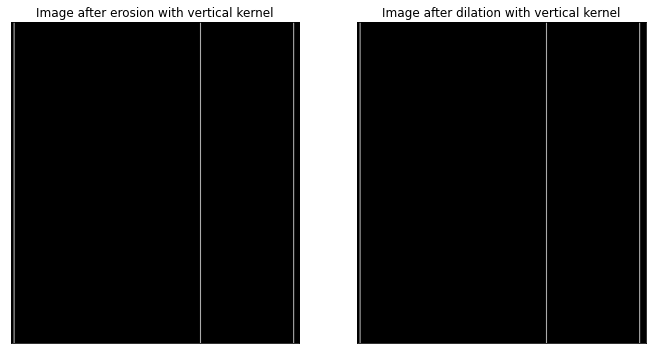

In [10]:
#Create vertical lines
plt.figure(figsize= (30,30))
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//50))

#Erosion
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=5)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

#Dilation
vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=5)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

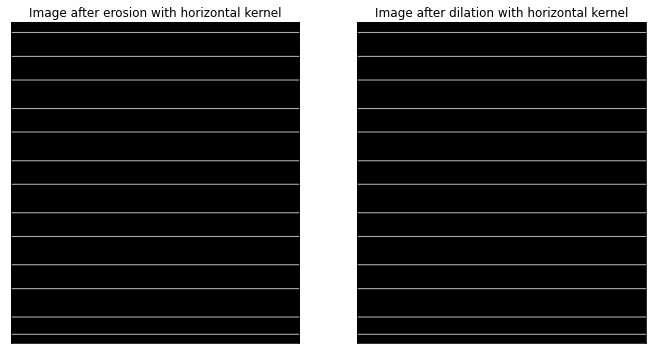

In [11]:
#create horizontal lines
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//80, 1))
plt.figure(figsize= (30,30))

#Erosion
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

#Dilation
horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

### Combine Two Images

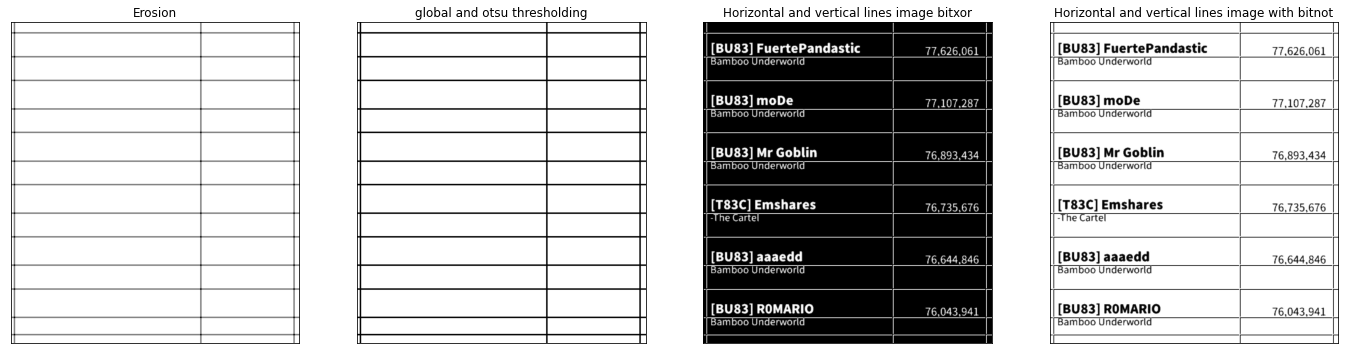

In [13]:
plt.figure(figsize= (30,30))

#Erosion
vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.25, horizontal_lines, 0.25, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

#Thresholding
thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

#bitxor image
bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

#bitnot image
bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

#  Creating Box and extracting text from Image

In [16]:
#create contours
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500 and w>180 ):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        boxes.append([x,y,w,h])
#Create rows
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
#print("Mean: ",mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
    if(boxes[i][1]<=previous[1]+mean/2):
        columns.append(boxes[i])
        previous=boxes[i]
        if(i==len(boxes)-1):
            rows.append(columns)
    else:
        rows.append(columns)
        columns=[]
        previous = boxes[i]
        columns.append(boxes[i])
for row in rows:
        print(row)
for i in range(0,len(rows)):
    for j in range (0,len(rows[i])):
        try:
            rows[i].remove([])
        except:
            x='Empty strings are deleted' #dummy code
total_cells=0
for i in range(0,len(rows)):
    if len(rows[i]) > total_cells:
        total_cells = len(rows[i])
print("Total Cells: ",total_cells)
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
center=np.array(center)
center.sort()
print("Center: ",center)
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
    box.sort(key=[].__eq__)
    print(box)

[[773, 0, 372, 41], [17, 0, 750, 41]]
[[773, 47, 372, 91], [17, 47, 750, 91]]
[[773, 144, 372, 90], [17, 144, 750, 90]]
[[773, 240, 372, 110], [17, 240, 750, 110]]
[[773, 356, 372, 89], [17, 356, 750, 89]]
[[773, 451, 372, 111], [17, 451, 750, 111]]
[[773, 568, 372, 89], [17, 568, 750, 89]]
[[773, 663, 372, 110], [17, 663, 750, 110]]
[[773, 779, 372, 90], [17, 779, 750, 90]]
[[773, 875, 372, 109], [17, 875, 750, 109]]
[[773, 990, 372, 91], [17, 990, 750, 91]]
[[773, 1087, 372, 109], [17, 1087, 750, 109]]
[[773, 1202, 372, 64], [17, 1202, 750, 64]]
[[773, 1272, 372, 31], [17, 1272, 750, 31]]
Total Cells:  2
Center:  [392 959]
[[[17, 0, 750, 41]], [[773, 0, 372, 41]]]
[[[17, 47, 750, 91]], [[773, 47, 372, 91]]]
[[[17, 144, 750, 90]], [[773, 144, 372, 90]]]
[[[17, 240, 750, 110]], [[773, 240, 372, 110]]]
[[[17, 356, 750, 89]], [[773, 356, 372, 89]]]
[[[17, 451, 750, 111]], [[773, 451, 372, 111]]]
[[[17, 568, 750, 89]], [[773, 568, 372, 89]]]
[[[17, 663, 750, 110]], [[773, 663, 372, 110]]]

In [17]:
#create dataframe
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
arr = np.array(dataframe_final)
dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))
data = dataframe.style.set_properties(align="left")
print(dataframe)

                          0            1
0                                       
1    [BU83] FuertePandastic   77,626,061
2         Bamboo Underworld             
3               [BU83] moDe   77,107,287
4         Bamboo Underworld             
5          [BU83] Mr Goblin   76,893,434
6         Bamboo Underworld             
7           [T83C] Emshares   76,735,676
8               -The Cartel           es
9             [BU83] aaaedd   76,644,846
10        Bamboo Underworld             
11           [BU83] ROMARIO   76,043,941
12        Bamboo Underworld             
13                                      
